# Single Note (C3) 2 Instrument Classifier (Violin vs Clarinet)

In [7]:
import os
from scipy.io import wavfile
from scipy.fftpack import fft
import matplotlib.pyplot as plt
from pylab import *

In [8]:
def convert_sec_to_index (sampleRate, time):
    return int(time * sampleRate)

In [27]:
def cut_process_samples (sample_dir):
    sample_directory_path = sample_dir
    clarinet_c_directory = sample_directory_path
    # print (clarinet_c_directory)

    for file in os.listdir(clarinet_c_directory) :
        """
            Mac directories... sigh
            Make sure Shortened Files have not already been written
        """
        if file == ".DS_Store" :
            continue
        if "Shortened" in file :
            continue
        filename = file
        print (filename)
        sampFreq, snd = wavfile.read(sample_directory_path + filename)

        restricted_range_snd = snd/(2.**15) # resctricts range to be from -1 to 1

        print ("Sample Duration: %f" %(restricted_range_snd.shape[0] / sampFreq))
        print ("Shape: %i" %(restricted_range_snd.shape[0]))

        timeArray = arange(0, restricted_range_snd.shape[0], 1)
        timeArray = timeArray / sampFreq
        timeArray = timeArray*1000

        print ("Plotted Sample Tone...")
        plt.plot(timeArray, restricted_range_snd, color='k')
        plt.ylabel('Amplitude')
        plt.xlabel('Time (ms)')
        plt.show()

        """
            Cut the sample to only use the sustained portion... then plot the tone.
        """
        print (snd.shape)
        start_time = .4
        start_time_index = convert_sec_to_index(sampFreq, start_time)
        end_time = .55
        end_time_index = convert_sec_to_index(sampFreq, end_time)

        print ("Start Time: %s\tStart Time Index: %s" %(start_time, start_time_index))
        print ("End Time: %s\tEnd Time Index: %s" %(end_time, end_time_index))

        shortened_snd = snd[start_time_index:end_time_index] / (2.**15)

        timeArray = arange(0, shortened_snd.shape[0], 1)
        timeArray = timeArray / sampFreq
        timeArray = timeArray*1000

        print ("Sustained Portion of Sample Tone...")
        plt.plot(timeArray, shortened_snd, color='k')
        plt.ylabel('Amplitude')
        plt.xlabel('Time (ms)')
        plt.show()

        """
            Write the shortened tone to a wav file
        """
        if 'Shortened' + filename not in os.listdir(clarinet_c_directory):
            wavfile.write(clarinet_c_directory + 'Shortened'+filename, sampFreq,
                          snd[start_time_index:end_time_index])

        """
            Perform Fourier Transform on shortened Tone
        """
        n = len(shortened_snd)
        p = fft(shortened_snd) #take the fourier transform

        nUniquePts = int (ceil(n+1)/2.0)
        p = p[0:nUniquePts]
        p = abs(p)

        p/float(n)

        p=p**2

        # multiply by two (see technical document for details)
        # odd nfft excludes Nyquist point
        if n % 2 > 0: # we've got odd number of points fft
            p[1:len(p)] = p[1:len(p)] * 2
        else:
            p[1:len(p) -1] = p[1:len(p) - 1] * 2 # we've got even number of points fft

        freqArray = arange(0, nUniquePts, 1.0) * (sampFreq / n);
        plt.plot(freqArray, 10*log10(p), color='k')
        axes = plt.gca()
        axes.set_xlim([0,2000])
        plt.xlabel('Frequency (kHz)')
        plt.ylabel('Power (dB)')
        plt.show()

## Clarinet Fourier Transforms

Clarinet-C-8.wav
Sample Duration: 1.552063
Shape: 68446
Plotted Sample Tone...


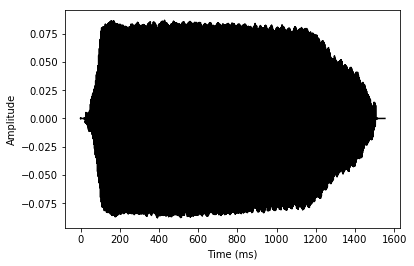

(68446,)
Start Time: 0.4	Start Time Index: 17640
End Time: 0.55	End Time Index: 24255
Sustained Portion of Sample Tone...


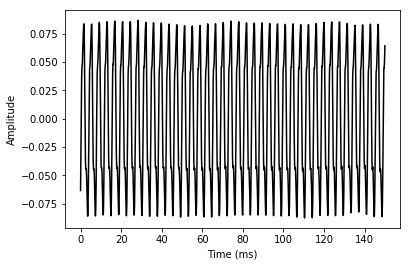

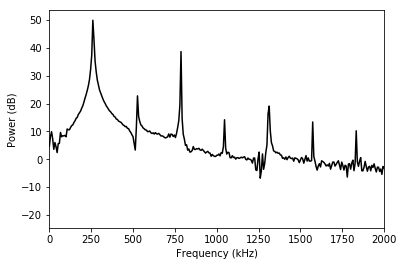

Clarinet-C-9.wav
Sample Duration: 1.605397
Shape: 70798
Plotted Sample Tone...


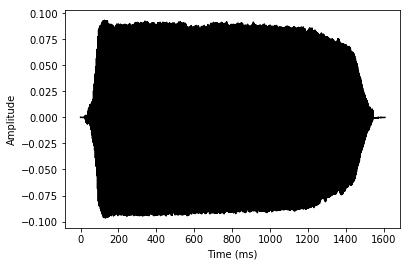

(70798,)
Start Time: 0.4	Start Time Index: 17640
End Time: 0.55	End Time Index: 24255
Sustained Portion of Sample Tone...


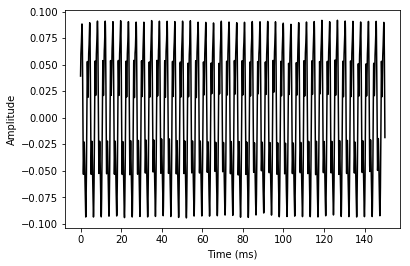

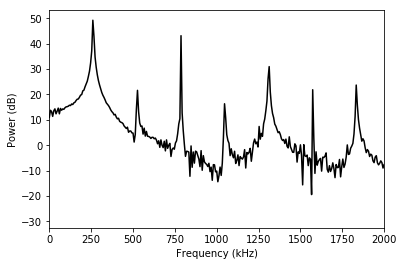

Clarinet-C-10.wav
Sample Duration: 2.335374
Shape: 102990
Plotted Sample Tone...


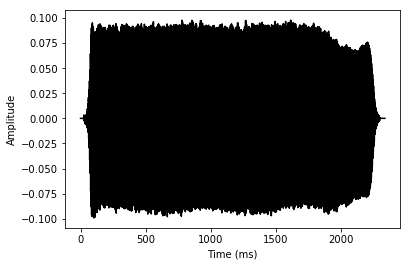

(102990,)
Start Time: 0.4	Start Time Index: 17640
End Time: 0.55	End Time Index: 24255
Sustained Portion of Sample Tone...


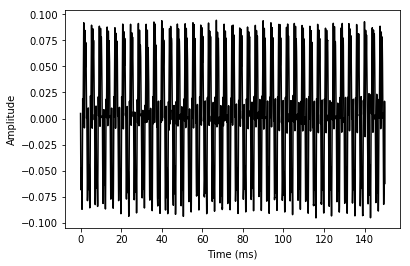

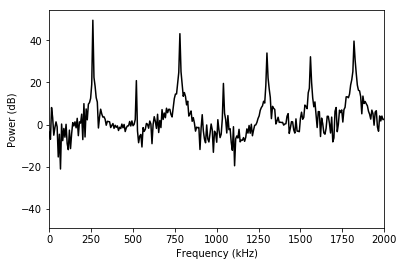

Clarinet-C-11.wav
Sample Duration: 2.127029
Shape: 93802
Plotted Sample Tone...


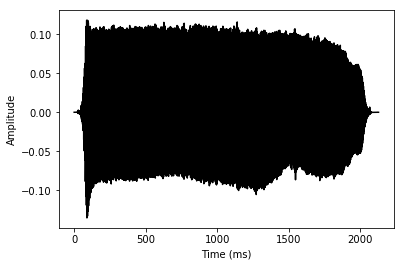

(93802,)
Start Time: 0.4	Start Time Index: 17640
End Time: 0.55	End Time Index: 24255
Sustained Portion of Sample Tone...


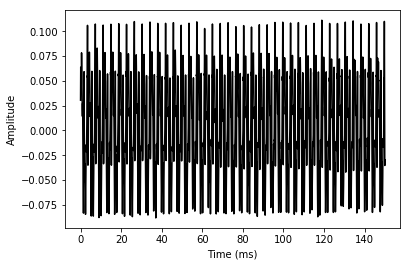

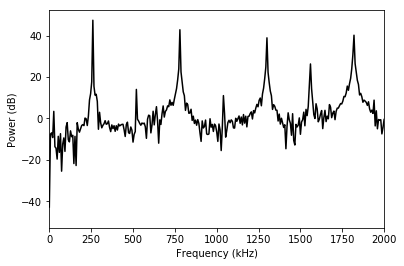

Clarinet-C-13.wav
Sample Duration: 2.127029
Shape: 93802
Plotted Sample Tone...


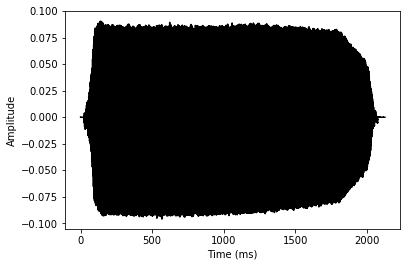

(93802,)
Start Time: 0.4	Start Time Index: 17640
End Time: 0.55	End Time Index: 24255
Sustained Portion of Sample Tone...


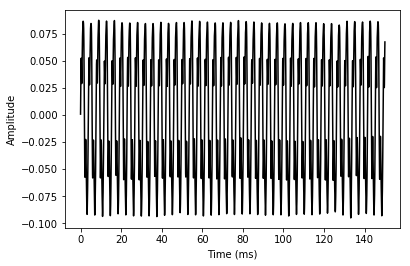

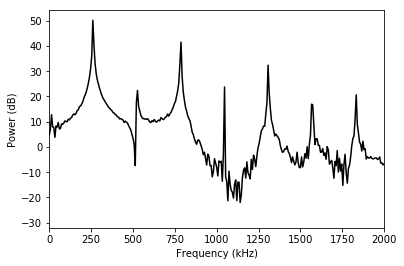

Clarinet-C-12.wav
Sample Duration: 2.467052
Shape: 108797
Plotted Sample Tone...


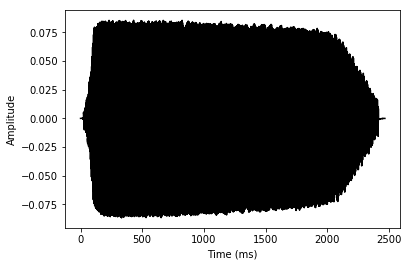

(108797,)
Start Time: 0.4	Start Time Index: 17640
End Time: 0.55	End Time Index: 24255
Sustained Portion of Sample Tone...


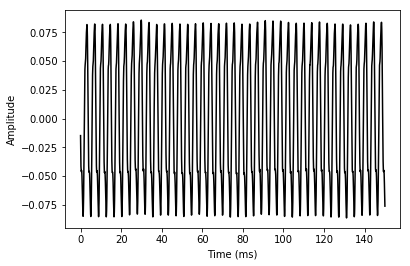

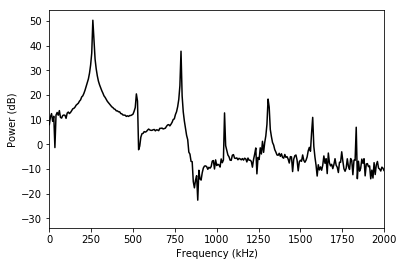

Clarinet-C-1.wav
Sample Duration: 2.375011
Shape: 104738
Plotted Sample Tone...


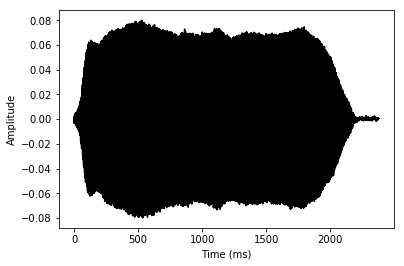

(104738,)
Start Time: 0.4	Start Time Index: 17640
End Time: 0.55	End Time Index: 24255
Sustained Portion of Sample Tone...


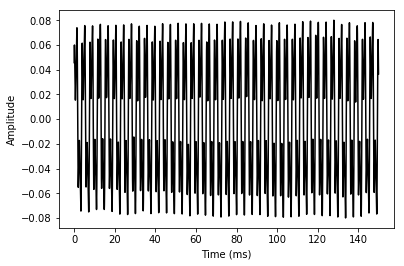

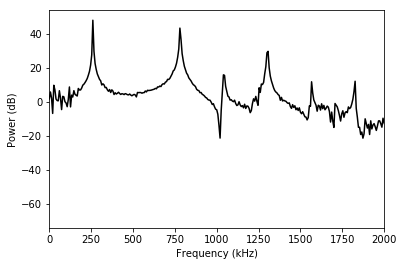

Clarinet-C-2.wav
Sample Duration: 2.875011
Shape: 126788
Plotted Sample Tone...


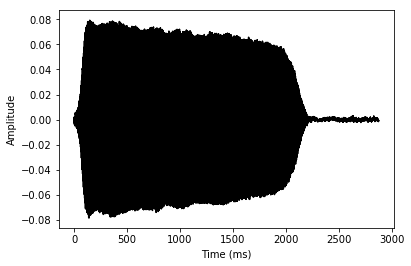

(126788,)
Start Time: 0.4	Start Time Index: 17640
End Time: 0.55	End Time Index: 24255
Sustained Portion of Sample Tone...


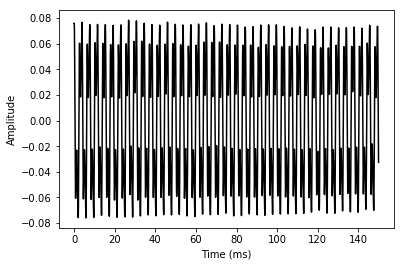

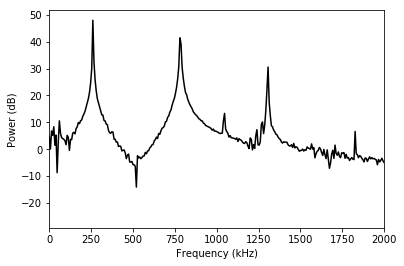

Clarinet-C-3.wav
Sample Duration: 2.875011
Shape: 126788
Plotted Sample Tone...


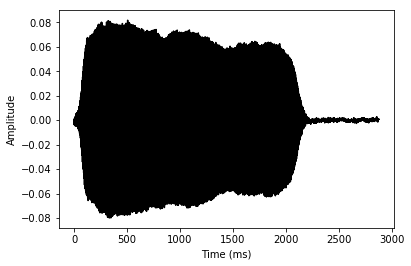

(126788,)
Start Time: 0.4	Start Time Index: 17640
End Time: 0.55	End Time Index: 24255
Sustained Portion of Sample Tone...


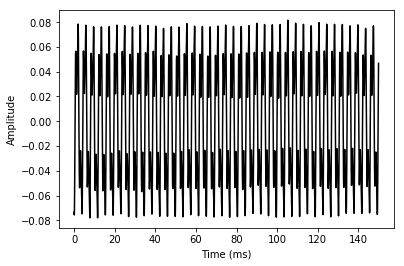

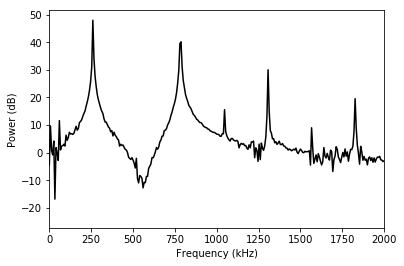

Clarinet-C-7.wav
Sample Duration: 1.683696
Shape: 74251
Plotted Sample Tone...


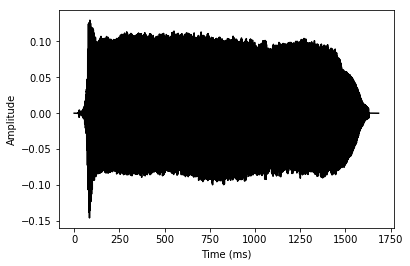

(74251,)
Start Time: 0.4	Start Time Index: 17640
End Time: 0.55	End Time Index: 24255
Sustained Portion of Sample Tone...


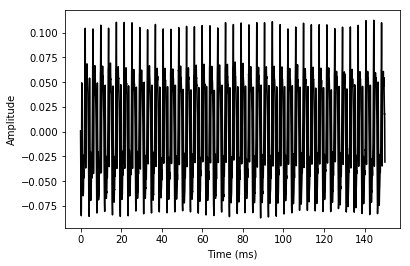

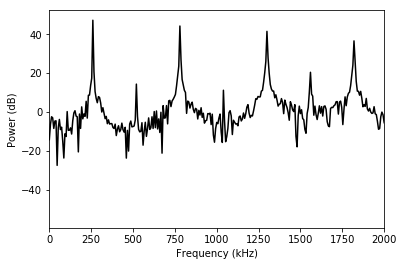

Clarinet-C-6.wav
Sample Duration: 1.657052
Shape: 73076
Plotted Sample Tone...


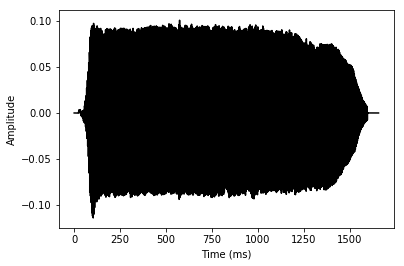

(73076,)
Start Time: 0.4	Start Time Index: 17640
End Time: 0.55	End Time Index: 24255
Sustained Portion of Sample Tone...


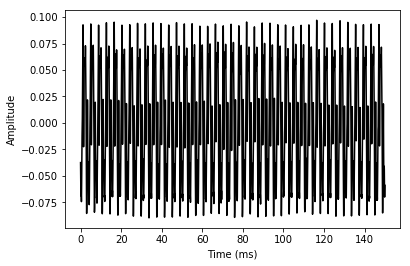

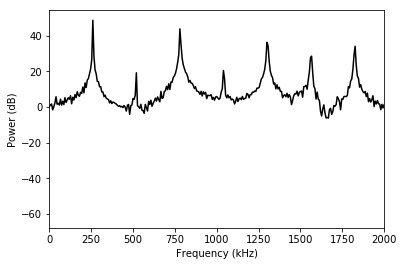

Clarinet-C-4.wav
Sample Duration: 2.875011
Shape: 126788
Plotted Sample Tone...


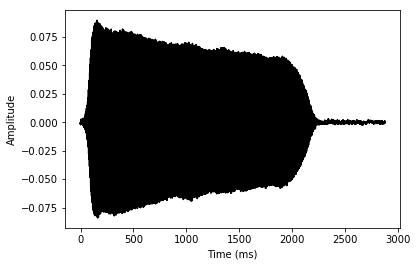

(126788,)
Start Time: 0.4	Start Time Index: 17640
End Time: 0.55	End Time Index: 24255
Sustained Portion of Sample Tone...


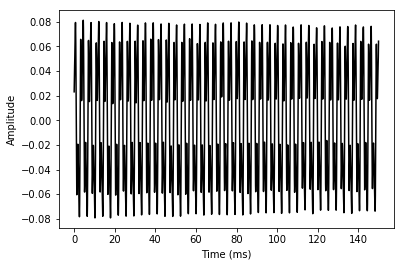

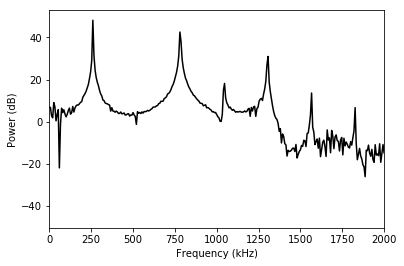

Clarinet-C-5.wav
Sample Duration: 2.750000
Shape: 121275
Plotted Sample Tone...


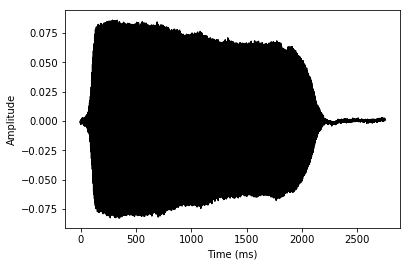

(121275,)
Start Time: 0.4	Start Time Index: 17640
End Time: 0.55	End Time Index: 24255
Sustained Portion of Sample Tone...


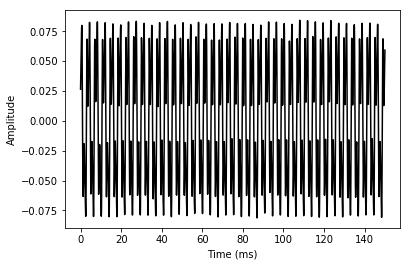

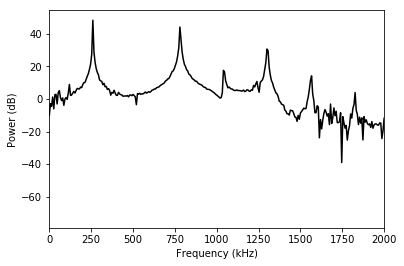

In [28]:
clarinet_c_directory = "./Samples/Clarinet/C/"

cut_process_samples(clarinet_c_directory)
    
    

## Violin Fourier Transforms

Violin-C-10.wav
Sample Duration: 1.708707
Shape: 75354
Plotted Sample Tone...


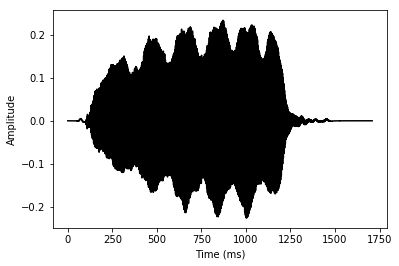

(75354,)
Start Time: 0.4	Start Time Index: 17640
End Time: 0.55	End Time Index: 24255
Sustained Portion of Sample Tone...


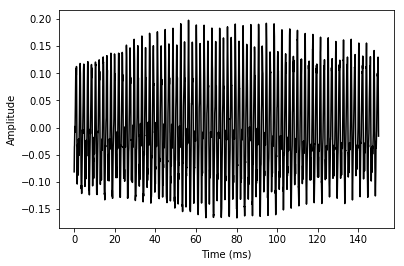

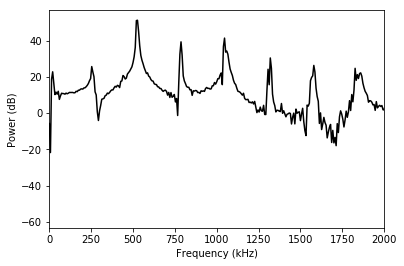

Violin-C-7.wav
Sample Duration: 1.448730
Shape: 63889
Plotted Sample Tone...


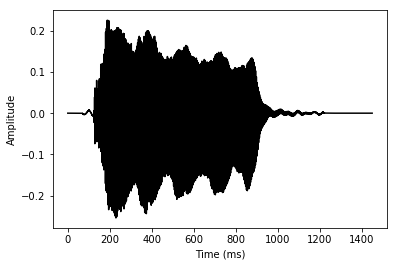

(63889,)
Start Time: 0.4	Start Time Index: 17640
End Time: 0.55	End Time Index: 24255
Sustained Portion of Sample Tone...


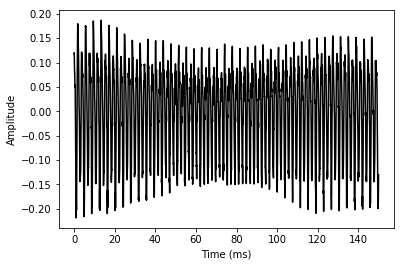

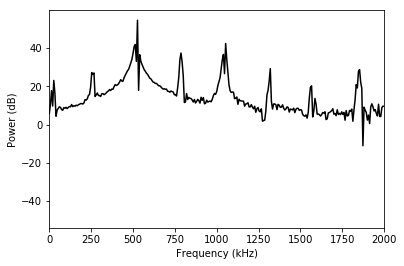

Violin-C-6.wav
Sample Duration: 1.292041
Shape: 56979
Plotted Sample Tone...


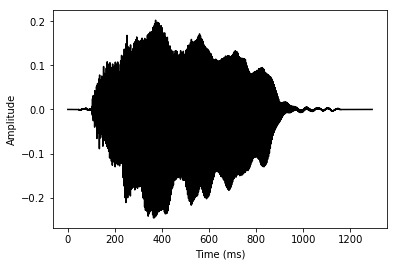

(56979,)
Start Time: 0.4	Start Time Index: 17640
End Time: 0.55	End Time Index: 24255
Sustained Portion of Sample Tone...


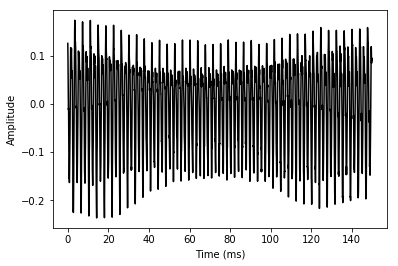

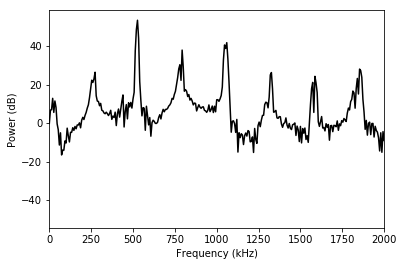

Violin-C-11.wav
Sample Duration: 2.178730
Shape: 96082
Plotted Sample Tone...


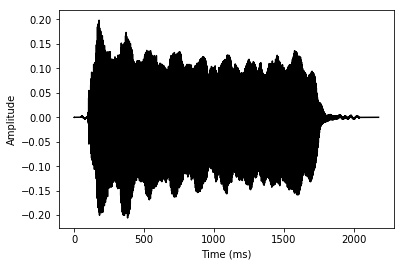

(96082,)
Start Time: 0.4	Start Time Index: 17640
End Time: 0.55	End Time Index: 24255
Sustained Portion of Sample Tone...


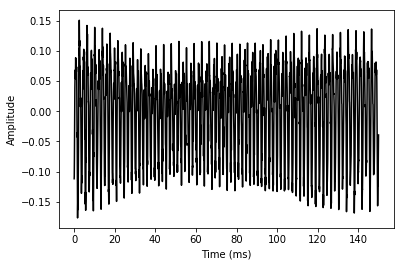

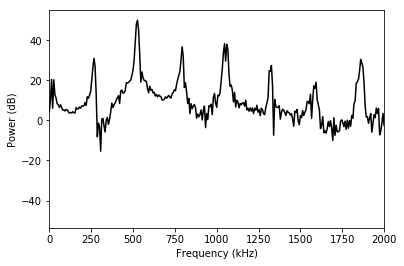

Violin-C-4.wav
Sample Duration: 3.375011
Shape: 148838
Plotted Sample Tone...


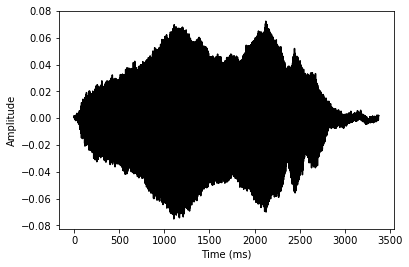

(148838,)
Start Time: 0.4	Start Time Index: 17640
End Time: 0.55	End Time Index: 24255
Sustained Portion of Sample Tone...


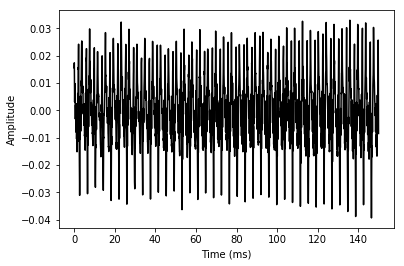

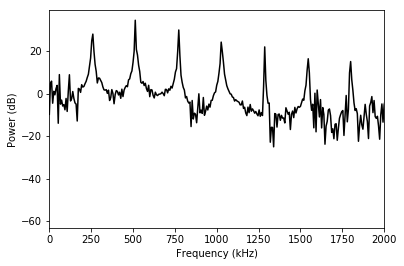

Violin-C-5.wav
Sample Duration: 3.000000
Shape: 132300
Plotted Sample Tone...


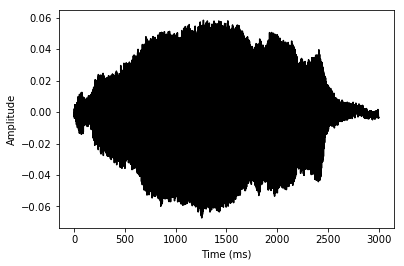

(132300,)
Start Time: 0.4	Start Time Index: 17640
End Time: 0.55	End Time Index: 24255
Sustained Portion of Sample Tone...


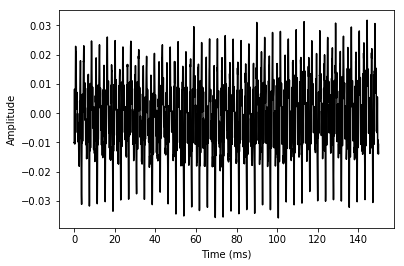

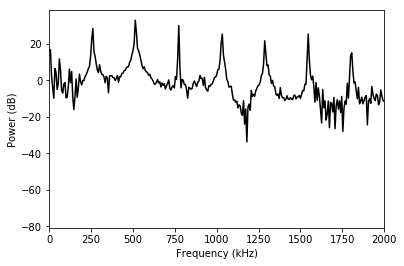

Violin-C-12.wav
Sample Duration: 1.082063
Shape: 47719
Plotted Sample Tone...


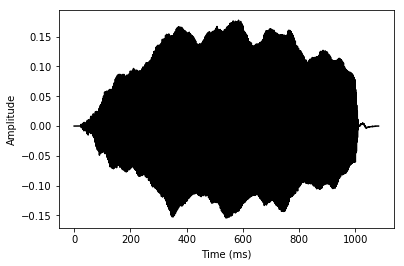

(47719,)
Start Time: 0.4	Start Time Index: 17640
End Time: 0.55	End Time Index: 24255
Sustained Portion of Sample Tone...


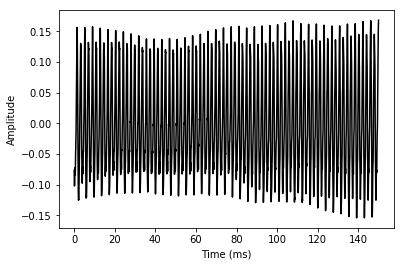

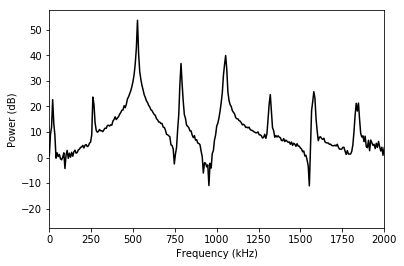

Violin-C-1.wav
Sample Duration: 3.750000
Shape: 165375
Plotted Sample Tone...


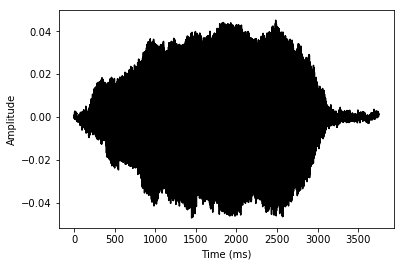

(165375,)
Start Time: 0.4	Start Time Index: 17640
End Time: 0.55	End Time Index: 24255
Sustained Portion of Sample Tone...


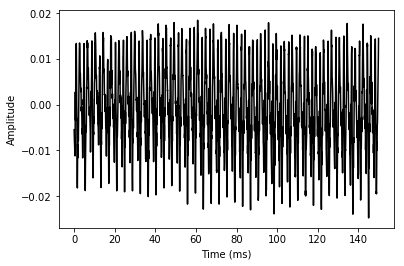

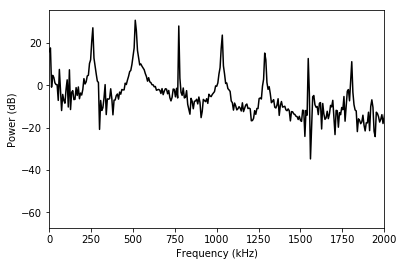

Violin-C-2.wav
Sample Duration: 3.500000
Shape: 154350
Plotted Sample Tone...


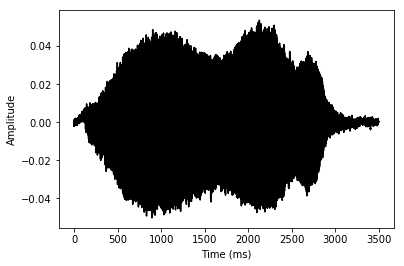

(154350,)
Start Time: 0.4	Start Time Index: 17640
End Time: 0.55	End Time Index: 24255
Sustained Portion of Sample Tone...


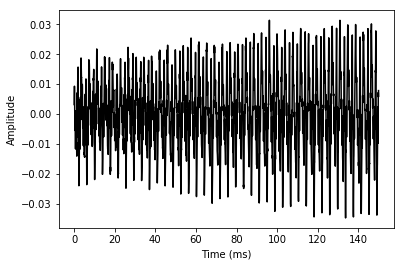

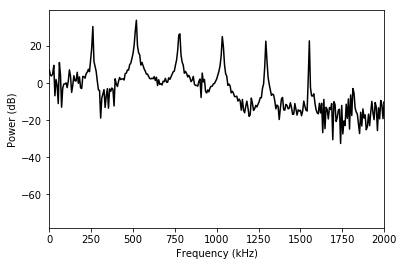

Violin-C-3.wav
Sample Duration: 3.500000
Shape: 154350
Plotted Sample Tone...


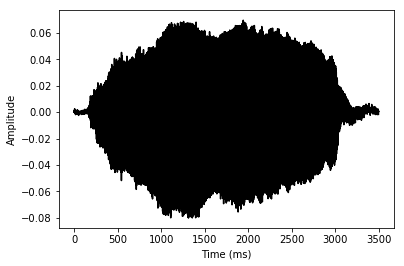

(154350,)
Start Time: 0.4	Start Time Index: 17640
End Time: 0.55	End Time Index: 24255
Sustained Portion of Sample Tone...


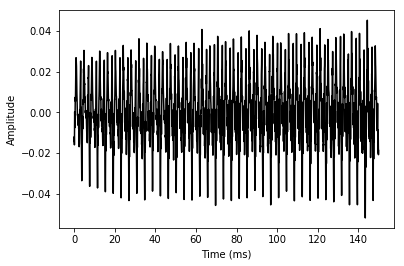

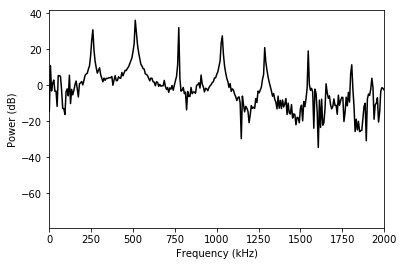

Violin-C-8.wav
Sample Duration: 1.395397
Shape: 61537
Plotted Sample Tone...


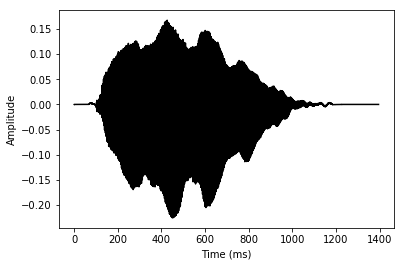

(61537,)
Start Time: 0.4	Start Time Index: 17640
End Time: 0.55	End Time Index: 24255
Sustained Portion of Sample Tone...


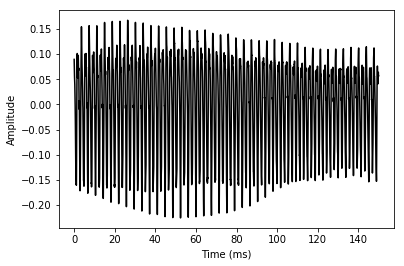

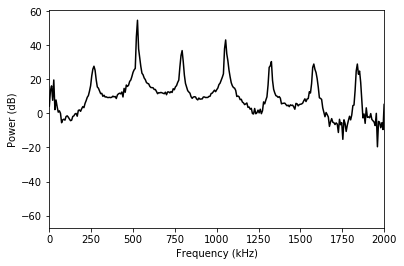

Violin-C-9.wav
Sample Duration: 1.238685
Shape: 54626
Plotted Sample Tone...


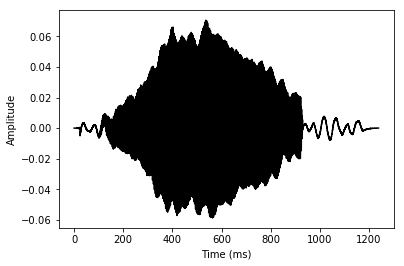

(54626,)
Start Time: 0.4	Start Time Index: 17640
End Time: 0.55	End Time Index: 24255
Sustained Portion of Sample Tone...


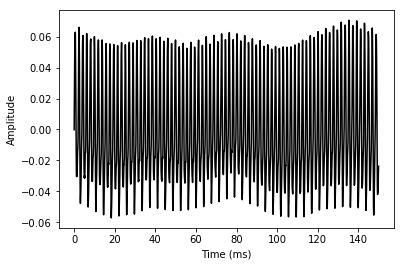

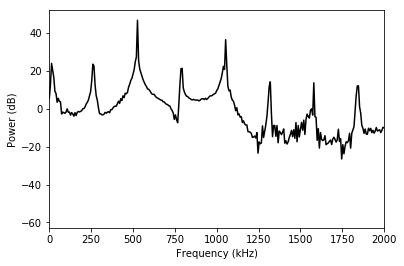

In [23]:
violin_c_directory = "./Samples/Violin/C/"

cut_process_samples(violin_c_directory)
    
    